## Cloning the Github repository

In [ ]:
!git clone https://github.com/PushpakBhoge512/Assignment.git

Cloning into 'Assignment'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 51 (delta 10), reused 38 (delta 6), pack-reused 0
Unpacking objects: 100% (51/51), done.


## Importing the necessary library

In [ ]:
import json
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import random


## A function to create a random color list for each label


In [ ]:
#The function takes the data length as argument
def create_color_list(data_length):
  color_list=[] 
  # run a while loop till we get a color for each label
  while(len(color_list)!=data_length):
    #using the randint function we get a random integer (0-255) for each rgba channel
    random_color=(random.randint(0,255),random.randint(0,255),random.randint(0,255))
    #check if color exist in list
    if random_color  not in color_list:
      color_list.append(random_color)
  return color_list


## Function to create a polygon and bounding box

In [ ]:
def data_visualization(img_path,json_path,output_file_name,opacity):
  #read the json file and load into data variable
  f = open(json_path) 
  data = json.load(f)
  #using the create_color_list we create a color_list
  create_color=create_color_list(len(data))
  #read the image and convert to array
  img=Image.open(img_path)
  img=np.array(img)
  #plot the original image using matplotlib imshow
  print('Original Image')
  plt.imshow(img)
  plt.show()
  #run a for loop to traverse through every polygon in a json file
  for i in range(0,len(data)):
    #only take those dictionary which have a from_name as label
    if data[i]['from_name']=='label':
      x=data[i]
      #extract the label and the polygon coordinates
      label=x['value']['polygonlabels'][0]
      coor=x['value']['points']
      denorm_coor=[]
      #using the formula we denormalize the coordinates and store it in denorm_coor
      for j in coor:
        denorm_coor.append([(j[0]*x['original_width']/100),(j[1]*x['original_height']/100)])
      #convert the coordinates to int32 and reshape the list
      pts = np.array(denorm_coor,np.int32)
      pts = pts.reshape((-1, 1, 2))
      # to draw the bounding box we extract the leftmost x coordinate, the rightmost x coordinate, the topmost y coordinate and the bottom most y coordinate
      max_x=np.max(pts[:,0][:,0])
      min_x=np.min(pts[:,0][:,0])
      min_y=np.min(pts[:,0][:,1])
      max_y=np.max(pts[:,0][:,1])

      # the leftmost coordinate of bounding box is (min x and min y) and rightmost is (max x and max y)
      left_corner=(min_x,min_y)
      right_corner=(max_x,max_y)
      # we perform all functions on an copy image
      overlay = img.copy()
      # using the denormalized coordinates we create a polygon using the open cv fillPoly function which fills the area between
      cv2.fillPoly(overlay,[pts],color=create_color[i])
      opacity = opacity
      #to make the polygon area little opaque, we use addWeighted function
      image=cv2.addWeighted(overlay, opacity, img, 1 - opacity, 0, img)
      #add a border to the polygon using the polylines function and pass a color from the color_list
      image=cv2.polylines(image,[pts],isClosed=True,color=create_color[i])
      #a bounding box is created using the left most and right most coordinate
      image=cv2.rectangle(image,left_corner,right_corner,create_color[i],1)
      # we need to add a text and background rectangle to it, so we need text size and height
      #font is FONT_HERSHEY_SIMPLEX, font_scale is 0.5 and thickness is 1
      text_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
      #extract height and width
      text_w, text_h = text_size
      #using a height and width create a rectangle with black background
      #leftmost is leftmost coordinate of bounding box
      #righmost coordinate is leftmost coordinate plus the height and width
      image=cv2.rectangle(image, (min_x,min_y), (min_x + text_w, min_y + text_h), (0,0,0), -1)
      #add a text in that rectangle usign putText
      # font_scale is 0, color is white, thickness is 1
      image=cv2.putText(image, label, (min_x, min_y + text_h  - 1), cv2.FONT_HERSHEY_SIMPLEX , 0.5, (255,255,255), 1)
  #finally plot the image using imshow
  #convert the array to image using Pillow library ans save it    
  print('Image with Object Visualization')
  plt.imshow(image)
  plt.show()
  image=Image.fromarray(image)
  image.save(output_file_name)


Original Image


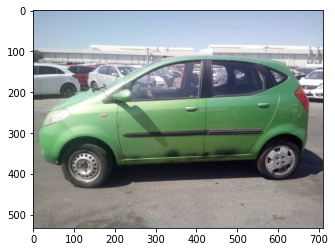

Image with Object Visualization


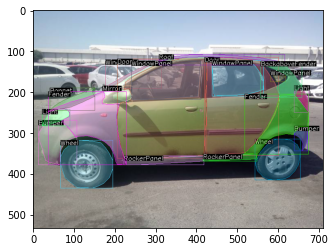

In [ ]:
data_visualization(img_path='/content/Assignment/Data Visualization/images/1.jpg',json_path='/content/Assignment/Data Visualization/data/1.json',output_file_name='1.jpg',opacity=0.3)

Original Image


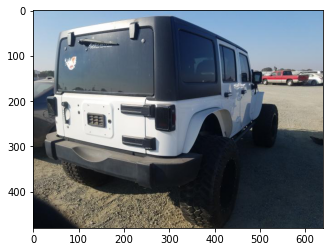

Image with Object Visualization


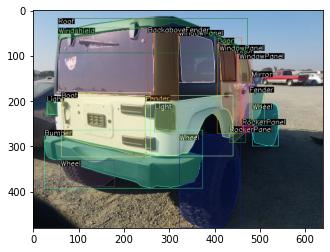

In [ ]:
data_visualization(img_path='/content/Assignment/Data Visualization/images/2.jpg',json_path='/content/Assignment/Data Visualization/data/2.json',output_file_name='2.jpg',opacity=0.3)

Original Image


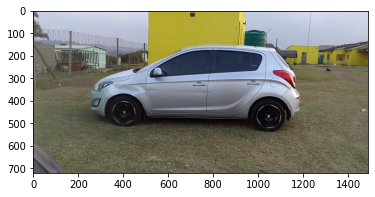

Image with Object Visualization


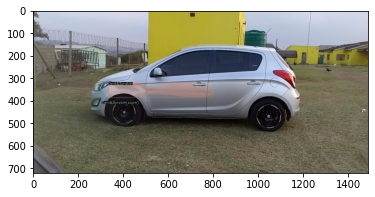

In [ ]:
data_visualization(img_path='/content/Assignment/Data Visualization/images/3.jpg',json_path='/content/Assignment/Data Visualization/data/3.json',output_file_name='3.jpg',opacity=0.3)

Original Image


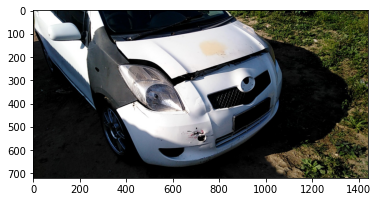

Image with Object Visualization


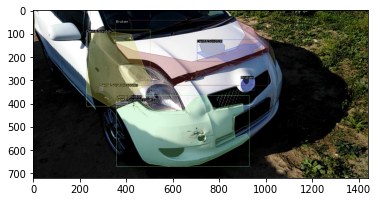

In [ ]:
data_visualization(img_path='/content/Assignment/Data Visualization/images/4.jpg',json_path='/content/Assignment/Data Visualization/data/4.json',output_file_name='4.jpg',opacity=0.3)

Original Image


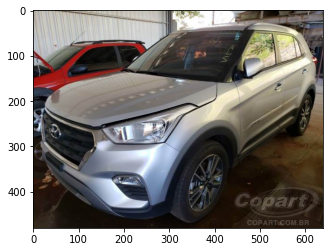

Image with Object Visualization


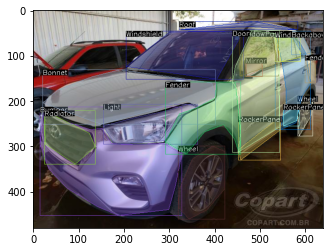

In [ ]:
data_visualization(img_path='/content/Assignment/Data Visualization/images/5.jpg',json_path='/content/Assignment/Data Visualization/data/5.json',output_file_name='5.jpg',opacity=0.3)